In [1]:
import numpy as np
import xarray as xr
from typing import Final
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]

In [2]:
FILENAME: Final[str] = "gs://solar-pv-nowcasting-data/PV/GSP/v5/pv_gsp.zarr"
ds = xr.open_dataset(FILENAME, engine="zarr")
ds

<xarray.Dataset>
Dimensions:                (datetime_gmt: 150865, gsp_id: 318)
Coordinates:
  * datetime_gmt           (datetime_gmt) datetime64[ns] 2014-01-01 ... 2022-...
  * gsp_id                 (gsp_id) int64 0 1 2 3 4 5 ... 313 314 315 316 317
Data variables:
    generation_mw          (datetime_gmt, gsp_id) float64 ...
    installedcapacity_mwp  (datetime_gmt, gsp_id) float64 ...

In [3]:
normalized_power = ds["generation_mw"] / ds["installedcapacity_mwp"]
normalized_power

<xarray.DataArray (datetime_gmt: 150865, gsp_id: 318)>
array([[ 0., nan, nan, ..., nan, nan, nan],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])
Coordinates:
  * datetime_gmt  (datetime_gmt) datetime64[ns] 2014-01-01 ... 2022-08-10
  * gsp_id        (gsp_id) int64 0 1 2 3 4 5 6 7 ... 311 312 313 314 315 316 317

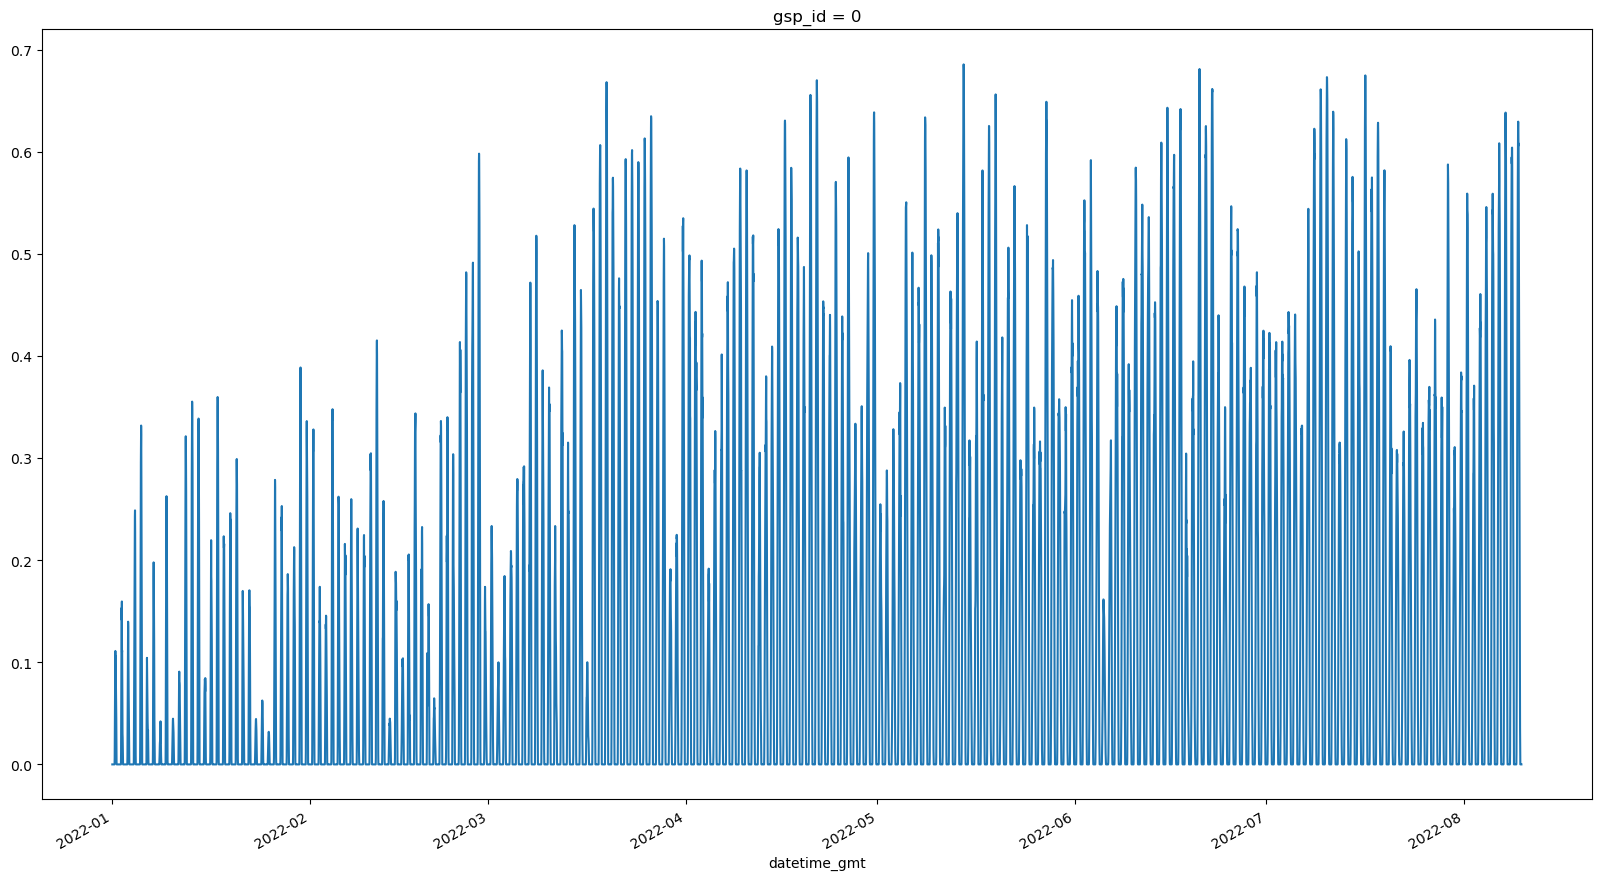

In [4]:
YEAR: Final[str] = "2022"
normalizedpower.sel(gsp_id=0, datetime_gmt=slice(f"{YEAR}-01-01", f"{YEAR}-12-31")).plot();

In [26]:
np.where(normalized_power.sel(gsp_id=0).isnull())[0]

array([50864, 50865, 56197, 59130, 96353, 96371])